In [4]:
import pandas as pd 



1188
890
743
683
1965
3430
3779
8496
1247
2229
16738
2376
17775
2458
15499
21043
9865
7371
32304
1782


# The objectives of the homework
The purpose of this homework is to build an image recognition system, using transfer learning and fine-tuning based on pre tuned convolutional neural networks on ImageNet. (http://www.image-net.org/).

## Ex. 1 — ImageNet

#### 1. What is ImageNet?

ImageNet is a large visual database designed for use in visual object recognition software research. It consists of a dataset of over 14 million URLs of images across 21,841 categories that have been hand-annotated by ImageNet to indicate what objects are pictured. Since 2010, the annual ImageNet Large Scale Visual Recognition Challenge (ILSVRC) is a competition where research teams evaluate their algorithms on the given data set, and compete to achieve higher accuracy on several visual recognition tasks.  The ImageNet Challenge uses a "trimmed" list of one thousand unambiguous classes.

#### 2. How many different kinds of cheese can you find in ImageNet

According to the ImageNet website, "cheese" is a solid food prepared from the pressed curd of milk. Imagenet has 759 different pictures of cheese categorized in 37 different kinds (http://image-net.org/synset?wnid=n07850329)

#### 3. What is the best classifier on ImageNet and what is its error rate?

On 1 Dec 2017, it was been reported that Google's NASNet was now the best Classifier on ImageNet (https://arxiv.org/pdf/1707.07012.pdf). The  model achieves a new state-of-the-art performance for with Top 1 Accuracy of 82.70% and Top 5 Accuracy of 96.20%. 

## Ex. 2 — Build an image recognition system

#### 1. Build an image recognition system for a 1000 everyday object categories (ImageNet ILSVRC) using Keras and TensorFlow

In [ ]:
import tensorflow
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras import backend
backend.set_image_dim_ordering('tf')

In [22]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [23]:
model = ResNet50(weights='imagenet')

#### 2. Define ResNet50 as you model and check its architecture

In [24]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_3[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

#### 3. What are the other pre trained networks available with keras? 

The other pre-trained models are Xception, VGG16, VGG19, InceptionV3, InceptionResNetV2, MobileNet, DenseNet, NASNet

#### 4. Open an image ("my_image.jpg" in the following example) representing a single object (if possible represented in ImageNet)

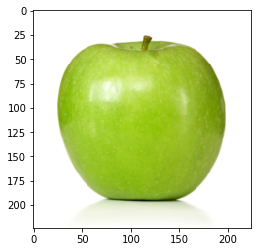

In [25]:
img_path = 'granny-smith.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

#### 5. Reshape the image to fit the input format of your model and preprocess the input

In [26]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

#### 6. Get the model predictions and display the top 5 recognized objects. Do you find the one represented on your image?

The top choice is indeed Granny_Smith with probability 0.9996773.

In [27]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=5)[0])

Predicted: [('n07742313', 'Granny_Smith', 0.9996773), ('n07749582', 'lemon', 7.2137387e-05), ('n07753592', 'banana', 6.1178202e-05), ('n07747607', 'orange', 2.7084459e-05), ('n07753113', 'fig', 1.3536568e-05)]


### Ex. 3 — Your turn

#### Based on your previous work, build an binary object recognition (only two objects) by transfer learning and fine tuning.

In our examples we will use two sets of pictures, which we get from Kaggle: 40 cats and 40 dogs (although the original dataset had 12,500 cats and 12,500 dogs, we just took the 80 images for each class). We also use 10 additional samples from each class as validation data, to evaluate our models. We organize our data  directory and validation data directory containing one subdirectory per image class. <br>
<br>
```
data/
    train/
        dogs/
            0.jpg
            1.jpg
            ...
        cats/
            0.jpg
            1.jpg
            ...
    validation/
        dogs/
            0.jpg
            1.jpg
            ...
        cats/
            0.jpg
            1.jpg
            ...
```
<br>
The original 25,000 image dataset can be downloaded both on the Kaggle website (https://www.kaggle.com/c/dogs-vs-cats/data) or the Microsoft website (https://www.microsoft.com/en-us/download/details.aspx?id=54765. )

Here are some examples of the cats and dogs: 

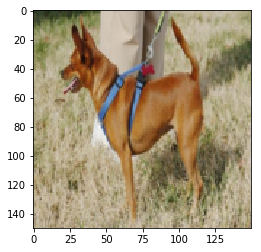

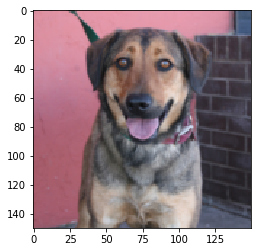

In [28]:
for i in range(2):
    img_path = str('data/train/dogs/'+str(i)+'.jpg')
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.show()

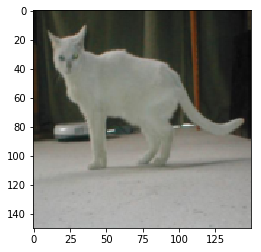

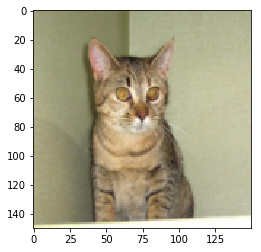

In [29]:
for i in range(2):
    img_path = str('data/train/cats/'+str(i)+'.jpg')
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.show()

We will preprocess our images for the exercise. Note we could use features augmentation, but for now we decide simply to rescale. 

In [30]:
from keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 150, 150
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 80
nb_validation_samples = 20
batch_size = 10

train_datagen = ImageDataGenerator(
        rescale=1./255)
#shear_range=0.2,
#        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=batch_size,class_mode='binary')

validation_generator  = validation_datagen.flow_from_directory(validation_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=batch_size,class_mode='binary')

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


We will use the VGG16 architecture, pre-trained on the ImageNet dataset. Our goal is to leverage the fact that VGG16 network would have already learned features that are useful for most computer vision problems, and leveraging such features would allow us to reach a better accuracy than any method that would only rely on the available data. Furthermore, because the ImageNet dataset contains several "cat" classes and many "dog" classes among its total of 1000 classes, this model will already have learned features that are relevant to our classification problem. 

Some background on the model: VGG16 (also called OxfordNet) is a convolutional neural network architecture named after the Visual Geometry Group from Oxford, who developed it. It was used to win the ILSVR (ImageNet) competition in 2014 (https://arxiv.org/abs/1409.1556). It is it still considered to be an excellent vision model, although it has been somewhat outperformed by more revent advances such as Inception and ResNet.


Here's what the VGG16 architecture looks like:
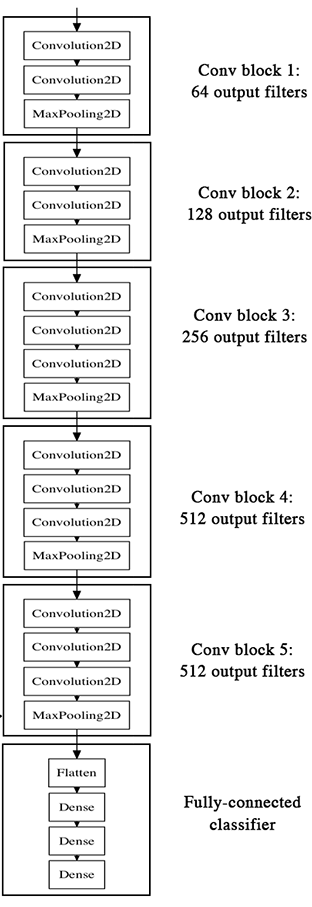

Let's start by defining the VGG16 model in Keras. The model loads a set of weights pre-trained on ImageNet. Note that we only go up to the last convolutional layer --we don't include fully-connected layers given our exercise. Indeed, we will train a small fully-connected model on top. 

In [31]:
# build the VGG16 network
from keras.applications.vgg16 import VGG16
base_model = VGG16(include_top=False, weights='imagenet', input_shape = (150,150,3))

#print layer names
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_4
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


## Transfer Learning

We freeze all the layers of the convolutional base and add our fully-connected model on top

In [32]:
for layer in base_model.layers:
    layer.trainable = False

In [33]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras.models import Model
from keras import optimizers

### Model 1 (Without Hyperparameter Tuning or Regularization)

In [34]:
m = Sequential()
m.add(Flatten(input_shape = base_model.output_shape[1:]))
m.add(Dense(64, activation='relu'))
m.add(Dense(1, activation='sigmoid'))

M = Model(inputs= base_model.input, outputs = m(base_model.output))

In [35]:
M.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

M.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [36]:
history = M.fit_generator(train_generator, steps_per_epoch= nb_train_samples // batch_size, 
                epochs=5,
                validation_data= validation_generator,
                nb_val_samples= nb_validation_samples//batch_size)

Epoch 1/5


/Users/alexmomeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/Users/alexmomeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=8, epochs=5, validation_data=<keras.pre..., validation_steps=2)`
  after removing the cwd from sys.path.


8/8 [==============================] - 34s 4s/step - loss: 1.1337 - acc: 0.4875 - val_loss: 0.7117 - val_acc: 0.5000
Epoch 2/5
8/8 [==============================] - 30s 4s/step - loss: 0.5435 - acc: 0.7875 - val_loss: 0.3961 - val_acc: 0.9000
Epoch 3/5
8/8 [==============================] - 30s 4s/step - loss: 0.2508 - acc: 0.9500 - val_loss: 0.6816 - val_acc: 0.6500
Epoch 4/5
8/8 [==============================] - 30s 4s/step - loss: 0.2255 - acc: 0.9375 - val_loss: 0.5317 - val_acc: 0.7500
Epoch 5/5
8/8 [==============================] - 30s 4s/step - loss: 0.1530 - acc: 0.9750 - val_loss: 0.3175 - val_acc: 0.8500


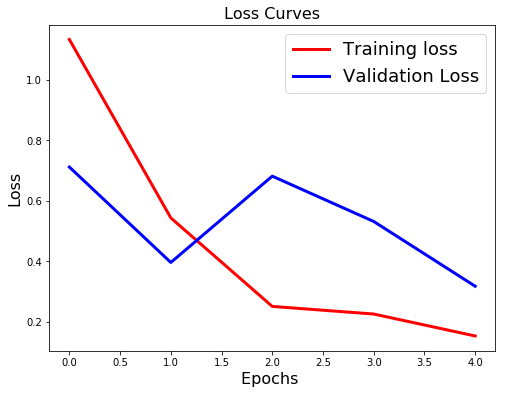

In [37]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

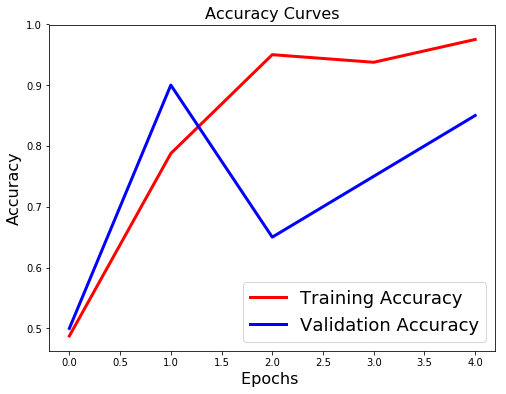

In [38]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

We notice that validation loss increases which implies overfitting occuring. The model can be improved by using regularization (weight decay), a slower learning rate and more agressive dropout. Let's add these features in and assess the improved performance. We will also look at different optimization techniques. 

### Model 2 (With Hyperparameter Tuning & Regularization) 

In [39]:
m = Sequential()
m.add(Flatten(input_shape = base_model.output_shape[1:]))
m.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l1(0.01)))
m.add(Dropout(0.5))
m.add(Dense(1, activation='sigmoid'))

M = Model(inputs= base_model.input, outputs = m(base_model.output))

In [40]:
##RMSprop optimizer

M.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001, rho=0.90,  decay=0.0),
              metrics=['accuracy'])

M.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [41]:
history = M.fit_generator(train_generator, steps_per_epoch= nb_train_samples // batch_size, 
                epochs=5,
                validation_data= validation_generator,
                nb_val_samples= nb_validation_samples//batch_size)

Epoch 1/5


/Users/alexmomeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/Users/alexmomeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=8, epochs=5, validation_data=<keras.pre..., validation_steps=2)`
  after removing the cwd from sys.path.


8/8 [==============================] - 31s 4s/step - loss: 67.9921 - acc: 0.4875 - val_loss: 64.6881 - val_acc: 0.6500
Epoch 2/5
8/8 [==============================] - 72s 9s/step - loss: 62.7862 - acc: 0.6375 - val_loss: 60.5625 - val_acc: 0.7500
Epoch 3/5
8/8 [==============================] - 32s 4s/step - loss: 58.8543 - acc: 0.7750 - val_loss: 56.8971 - val_acc: 0.8000
Epoch 4/5
8/8 [==============================] - 31s 4s/step - loss: 55.3254 - acc: 0.8250 - val_loss: 53.4709 - val_acc: 0.9000
Epoch 5/5
8/8 [==============================] - 31s 4s/step - loss: 52.0113 - acc: 0.8000 - val_loss: 50.2211 - val_acc: 0.8000


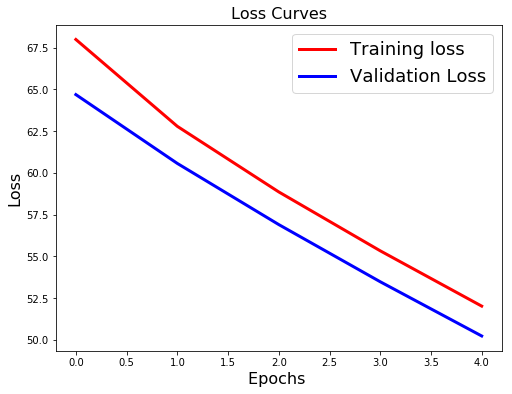

In [42]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

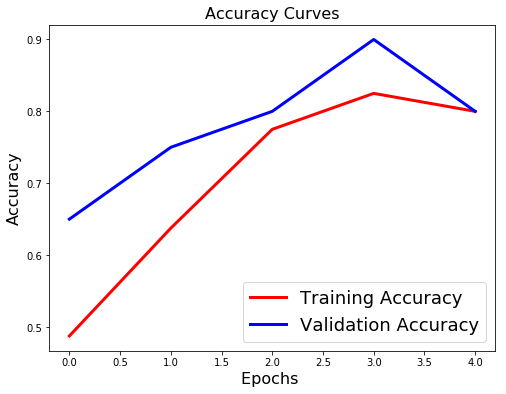

In [43]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

Let's check for another optimizer:

In [44]:
###SGD with momentum optimizer

M.compile(loss='binary_crossentropy',
          optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
          metrics=['accuracy'])

history = M.fit_generator(train_generator, steps_per_epoch= nb_train_samples // batch_size, 
                epochs=5,
                validation_data= validation_generator,
                nb_val_samples= nb_validation_samples//batch_size)

/Users/alexmomeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/Users/alexmomeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=8, epochs=5, validation_data=<keras.pre..., validation_steps=2)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/5
8/8 [==============================] - 32s 4s/step - loss: 50.0539 - acc: 0.8625 - val_loss: 50.0713 - val_acc: 0.8500
Epoch 2/5
8/8 [==============================] - 35s 4s/step - loss: 49.9027 - acc: 0.8250 - val_loss: 49.7815 - val_acc: 0.9000
Epoch 3/5
8/8 [==============================] - 32s 4s/step - loss: 49.5587 - acc: 0.8250 - val_loss: 49.4668 - val_acc: 0.9000
Epoch 4/5
8/8 [==============================] - 31s 4s/step - loss: 49.2448 - acc: 0.8750 - val_loss: 49.1374 - val_acc: 0.8500
Epoch 5/5
8/8 [==============================] - 30s 4s/step - loss: 48.8765 - acc: 0.9000 - val_loss: 48.7346 - val_acc: 0.9500


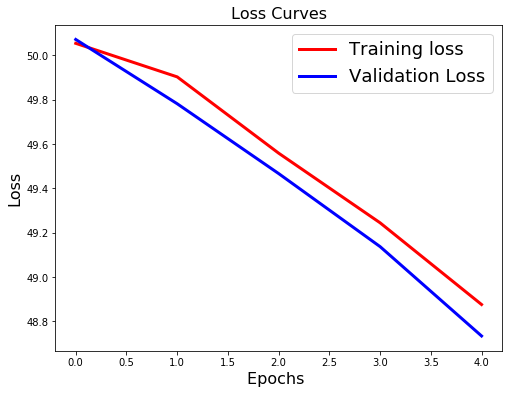

In [45]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

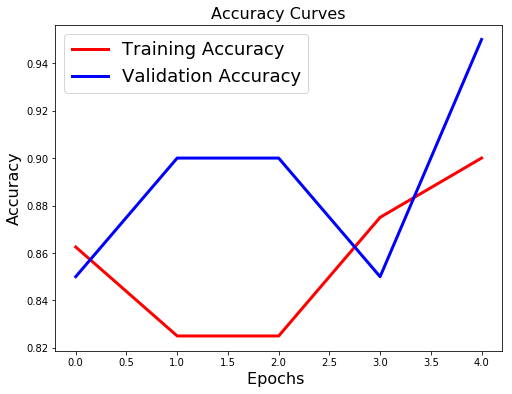

In [46]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

We notice the improvement in validation loss as well as validation accuracy for both these model. We could continue fine-tuning the hyperparameters but given our limited computational resources, we will be satisfied with the above. Indeed, we could have instead stored the features offline rather than adding our fully-connected model directly on top of a frozen convolutional base and running the whole thing to be computationally more efficient, but we will focus our attention on fine tuning now. 

To conclude the transfer learning section, we have achieved a very high validation accuracy by simply freezing the convolutional layers and building a fully connected layer on top. This is definitely partly due to the fact that the base model was trained on a dataset that already featured dogs and cats (among hundreds of other classes) and because we have fine tuned the hyperparameters to improve our base line model. We want to check whether we could increase this using fine tuning (i.e unfreezing convolutional blocks and fine tuning the ConvNet weights) in the final layers. The idea is that ConvNet features are more generic in early layers and more original-dataset-specific in later layers.

## Fine Tuning 

Now we turn our attention to fine-tuning. We will unfreeze conv block 5 and conv block 4 and 5. We will use a smaller learning rate for ConvNet weights that are being fine-tuned. This is because we expect that the ConvNet weights are relatively good, so we don’t wish to distort them too quickly and too much.

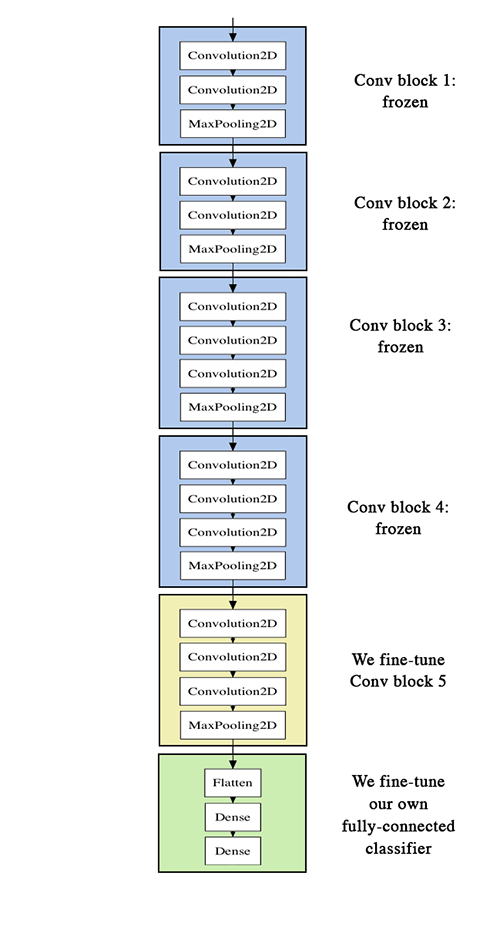

#### Freeze the only the first 15 layers of the model (Conv Block 5)

In [47]:
for i, layer in enumerate(base_model.layers[:15]):
    print(i, layer.name)
    layer.trainable = False

0 input_4
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool


In [48]:
M.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001, rho=0.90,  decay=0.0),
              metrics=['accuracy'])

history = M.fit_generator(train_generator, steps_per_epoch= nb_train_samples // batch_size, 
                epochs=5,
                validation_data= validation_generator,
                nb_val_samples= nb_validation_samples//batch_size)

/Users/alexmomeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/Users/alexmomeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=8, epochs=5, validation_data=<keras.pre..., validation_steps=2)`
  


Epoch 1/5
8/8 [==============================] - 33s 4s/step - loss: 45.8617 - acc: 0.8500 - val_loss: 43.2348 - val_acc: 0.8500
Epoch 2/5
8/8 [==============================] - 33s 4s/step - loss: 41.5682 - acc: 0.9000 - val_loss: 39.8141 - val_acc: 0.9000
Epoch 3/5
8/8 [==============================] - 31s 4s/step - loss: 38.4115 - acc: 0.9125 - val_loss: 36.8423 - val_acc: 0.8000
Epoch 4/5
8/8 [==============================] - 30s 4s/step - loss: 35.6318 - acc: 0.8500 - val_loss: 34.1416 - val_acc: 0.9000
Epoch 5/5
8/8 [==============================] - 33s 4s/step - loss: 32.9119 - acc: 0.9125 - val_loss: 31.5804 - val_acc: 0.9000


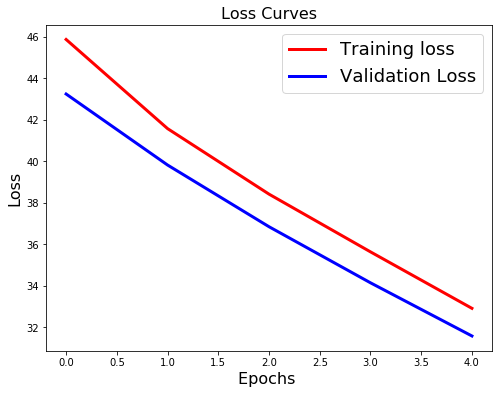

In [49]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

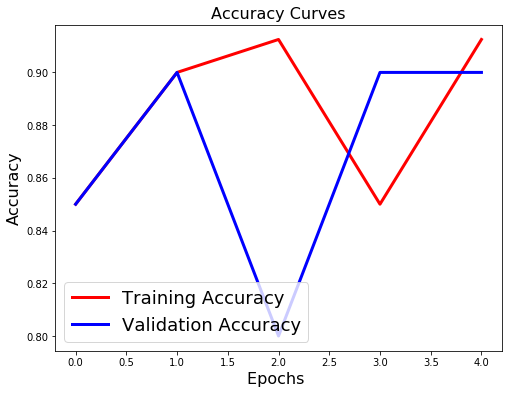

In [50]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

In [51]:
###Using a different optimizer SGD(lr=1e-4, momentum=0.9)

M.compile(loss='binary_crossentropy',
          optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
          metrics=['accuracy'])

history = M.fit_generator(train_generator, steps_per_epoch= nb_train_samples // batch_size, 
                epochs=5,
                validation_data= validation_generator,
                nb_val_samples= nb_validation_samples//batch_size)
    

/Users/alexmomeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/Users/alexmomeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=8, epochs=5, validation_data=<keras.pre..., validation_steps=2)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/5
8/8 [==============================] - 33s 4s/step - loss: 31.4198 - acc: 0.9375 - val_loss: 31.4321 - val_acc: 0.9000
Epoch 2/5
8/8 [==============================] - 32s 4s/step - loss: 31.2017 - acc: 0.9500 - val_loss: 31.2098 - val_acc: 0.9000
Epoch 3/5
8/8 [==============================] - 36s 5s/step - loss: 31.0067 - acc: 0.9250 - val_loss: 30.9633 - val_acc: 0.9000
Epoch 4/5
8/8 [==============================] - 37s 5s/step - loss: 30.7548 - acc: 0.8875 - val_loss: 30.7061 - val_acc: 0.9000
Epoch 5/5
8/8 [==============================] - 33s 4s/step - loss: 30.4308 - acc: 0.9500 - val_loss: 30.4282 - val_acc: 0.9000


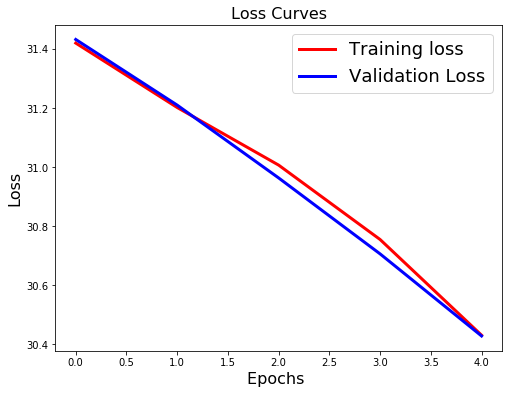

In [52]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

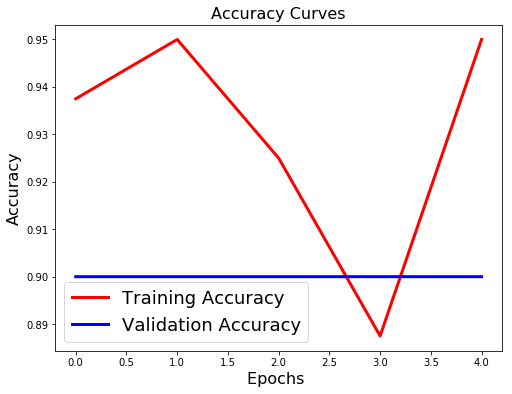

In [54]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

We conclude that unfreezing conv block 5 helps us achieve some slight improvement in the validation accuracy as it learns data specific features in the later convolutional layers. However, note that this difference is not of a very large magnitude vs. just using transfer learning. We will explore this one step further by unfreezing one additional convolution block, whilst being careful not to overfit. 

#### Freeze the only the first 10 layers of the model (Conv Block 5 and 4)

In [55]:
##Freezing first 10 layers
for i, layer in enumerate(base_model.layers[:11]):
    print(i,layer.name)
    layer.trainable = False

0 input_4
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool


In [56]:
M.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001, rho=0.90,  decay=0.0),
              metrics=['accuracy'])

history = M.fit_generator(train_generator, steps_per_epoch= nb_train_samples // batch_size, 
                epochs=5,
                validation_data= validation_generator,
                nb_val_samples= nb_validation_samples//batch_size)
    

/Users/alexmomeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/Users/alexmomeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=8, epochs=5, validation_data=<keras.pre..., validation_steps=2)`
  


Epoch 1/5
8/8 [==============================] - 32s 4s/step - loss: 28.2372 - acc: 0.8875 - val_loss: 26.1369 - val_acc: 0.8500
Epoch 2/5
8/8 [==============================] - 30s 4s/step - loss: 24.8692 - acc: 0.9625 - val_loss: 23.4840 - val_acc: 0.9500
Epoch 3/5
8/8 [==============================] - 30s 4s/step - loss: 22.4123 - acc: 0.9625 - val_loss: 21.2907 - val_acc: 0.9000
Epoch 4/5
8/8 [==============================] - 31s 4s/step - loss: 20.2969 - acc: 0.9125 - val_loss: 19.2476 - val_acc: 0.9000
Epoch 5/5
8/8 [==============================] - 31s 4s/step - loss: 18.3408 - acc: 0.9500 - val_loss: 17.3888 - val_acc: 0.9000


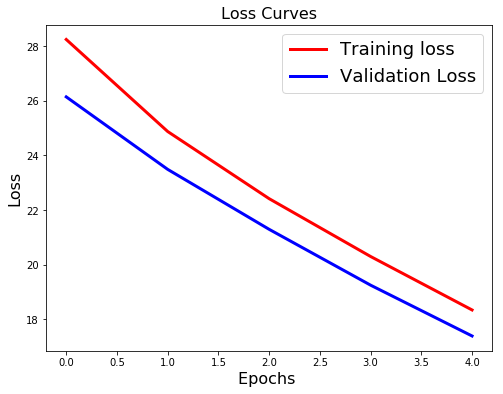

In [57]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

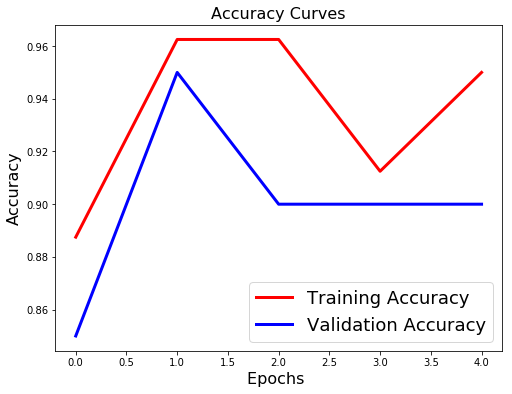

In [58]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

In [59]:
M.compile(loss='binary_crossentropy',
          optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
          metrics=['accuracy'])

history = M.fit_generator(train_generator, steps_per_epoch= nb_train_samples // batch_size, 
                epochs=5,
                validation_data= validation_generator,
                nb_val_samples= nb_validation_samples//batch_size)

/Users/alexmomeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/Users/alexmomeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=8, epochs=5, validation_data=<keras.pre..., validation_steps=2)`
  


Epoch 1/5
8/8 [==============================] - 33s 4s/step - loss: 17.1799 - acc: 0.9625 - val_loss: 17.2349 - val_acc: 0.9000
Epoch 2/5
8/8 [==============================] - 33s 4s/step - loss: 17.0158 - acc: 0.9750 - val_loss: 17.0579 - val_acc: 0.9000
Epoch 3/5
8/8 [==============================] - 36s 4s/step - loss: 16.8636 - acc: 0.9375 - val_loss: 16.7874 - val_acc: 0.9500
Epoch 4/5
8/8 [==============================] - 30s 4s/step - loss: 16.6613 - acc: 0.9625 - val_loss: 16.6775 - val_acc: 0.9000
Epoch 5/5
8/8 [==============================] - 30s 4s/step - loss: 16.4358 - acc: 1.0000 - val_loss: 16.4752 - val_acc: 0.9000


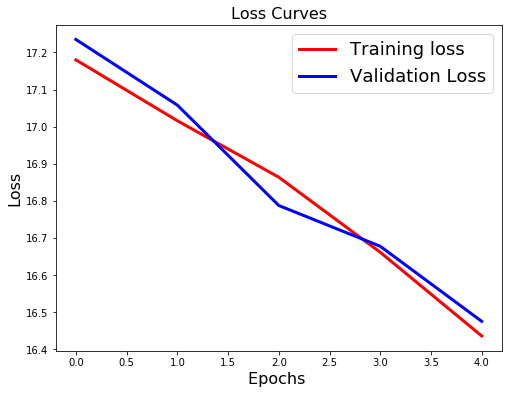

In [60]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

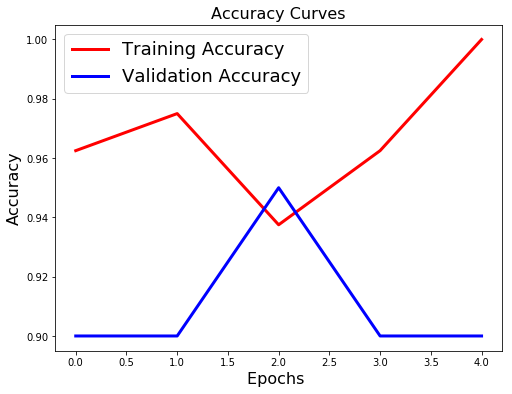

In [61]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

There is an improvement by unfreezing Block 4 in addition to Block 5. Thus it seems that the key differentiation happens by backpropogating through two full convolutional blocks. Indeed, the convolutional weights are adjusted slightly to improve the validation accuracy. We will use our final model to run a few predictions on a test set of unseen data. 

#### Prediction 

Here are 4 dogs are and 4 cats which we take from a folder 
```
data/
    test/
        dogs/
            0.jpg
            1.jpg
            ...
        cats/
            0.jpg
            1.jpg
            ...
```

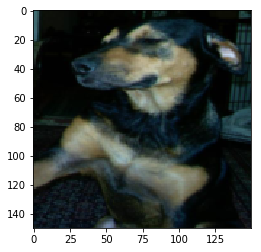

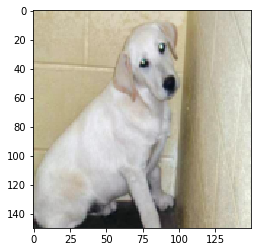

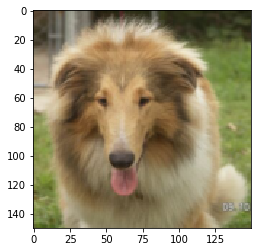

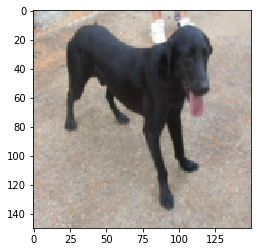

In [81]:
for i in range(4):
    img_path = str('data/test/dogs/'+str(i)+'.jpg')
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.show()

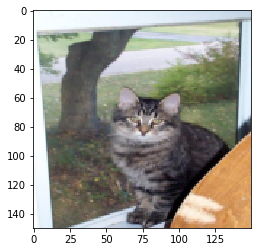

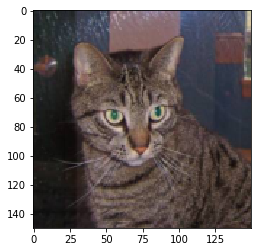

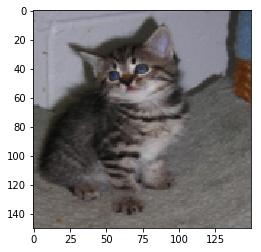

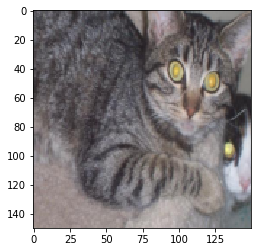

In [89]:
for i in range(4):
    img_path = str('data/test/cats/'+str(i)+'.jpg')
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.show()

Let's see if the model can predict them accurately: 

In [90]:
for i in range(4):
    img_path = str('data/test/dogs/'+str(i)+'.jpg')
    img = image.load_img(img_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = M.predict(x)
    print(preds)  

[[ 1.]]
[[ 1.]]
[[ 1.]]
[[ 1.]]


In [93]:
for i in range(0,4):
    img_path = str('data/test/cats/'+str(i)+'.jpg')
    img = image.load_img(img_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = M.predict(x)
    print(preds)  

[[  4.10592493e-09]]
[[  6.31367736e-11]]
[[ 0.06995723]]
[[ 0.00269631]]


Great success! We have classified dogs and cats accurately (Note: whilst we can be happy withour algorithm, an average 4 year old could achieve this task with 100% accuracy. Thus there is still room for improvement in our model). 

#### Is it better to do transfer learning or fine tuning?

In transfer learning, we first train a base network on a base dataset and task, and then we repurpose the learned 
features, or transfer them, to a second target network to be trained on a target dataset and task. This process 
will tend to work if the features are general, meaning suitable to both base and target tasks, instead of specific 
to the base task. When the target dataset is significantly smaller than the base dataset, transfer learning can be 
a powerful tool to enable training a large target network without overfitting. The usual transfer learning 
approach is to train a base network and then copy its first n layers to the first n layers of a target network.
The remaining layers of the target network are then randomly initialized and trained toward the target task. Ideally, the base dataset will have some similary the target dataset (i.e. we are not comparing dog images to medical images for examples.

One can choose to backpropagate the errors from the new task into the base features to fine-tune them to the new 
task, or the transferred feature layers can be left frozen, meaning that they do not change during training on the 
new task. The choice of whether or not to fine-tune the first n layers of the target network depends on the size 
of the target dataset and the number of parameters in the first n layers. If the target dataset is small and the 
number of parameters is large, fine-tuning may result in overfitting, so the features are often left frozen. On 
the other hand, if the target dataset is large or the number of parameters is small, so that overfitting is not a 
problem, then the base features can be fine-tuned to the new task to improve performance. 

Taking into account these factors is essential when deciding whether to perform transfer learning and in deciding how many layers to freeze. 

Interesting paper on the subject - https://arxiv.org/abs/1411.1792